## Regresión Polinómica en el Conjunto de Datos de Viviendas de Boston

**En este notebook hacemos un estudio comparativo de la precisión de Regresión Lineal y Regresión Polinómica en el Conjunto de Datos de Viviendas de Boston**

Estos datos fueron originalmente parte del Repositorio de Aprendizaje Automático de UCI y han sido eliminados ahora. Estos datos también se incluyen con la biblioteca scikit-learn. 
Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de las casas usando las características dadas.

La descripción de todas las características se proporciona a continuación:

  **CRIM**: Tasa de criminalidad per cápita por ciudad

  **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados

  **INDUS**: Proporción de acres de negocios no minoristas por ciudad

  **CHAS**: Variable ficticia del Río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

  **NOX**: Concentración de óxido nítrico (partes por 10 millones)

  **RM**: Número promedio de habitaciones por vivienda

  **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940

  **DIS**: Distancias ponderadas a cinco centros de empleo de Boston

  **RAD**: Índice de accesibilidad a autopistas radiales

  **TAX**: Tasa de impuesto a la propiedad de valor completo por $10,000

  **B**: 1000(Bk - 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

  **LSTAT**: Porcentaje de estatus inferior de la población

  **MEDV**: Valor mediano de viviendas ocupadas por propietarios en $1000s

**Importar las librerías requeridas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Cargar los datos en un dataframe de pandas. Cargar el Conjunto de Datos de Viviendas de Boston desde data/boston_house_prices.csv**

In [5]:
df = pd.read_csv('data/boston_house_prices.csv', header=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Preprocesamiento de datos**

Verificar valores faltantes en todas las columnas

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Visualización de Datos**

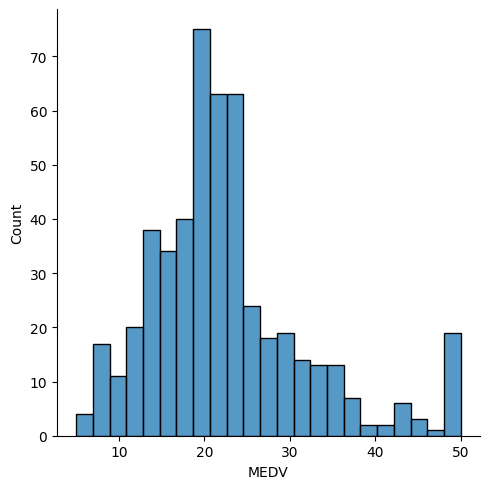

In [9]:
sns.displot(df['MEDV'])

**Matriz de correlación**

Analizar la matriz de correlación. Trazar un mapa de calor

* Desde el gráfico de correlación: ¿cuáles son las columnas que están más correlacionadas con **MEDV**?
* Hay dos características altamente correlacionadas. Identifícalas y elimina una de ellas para evitar la multicolinealidad

<Axes: >

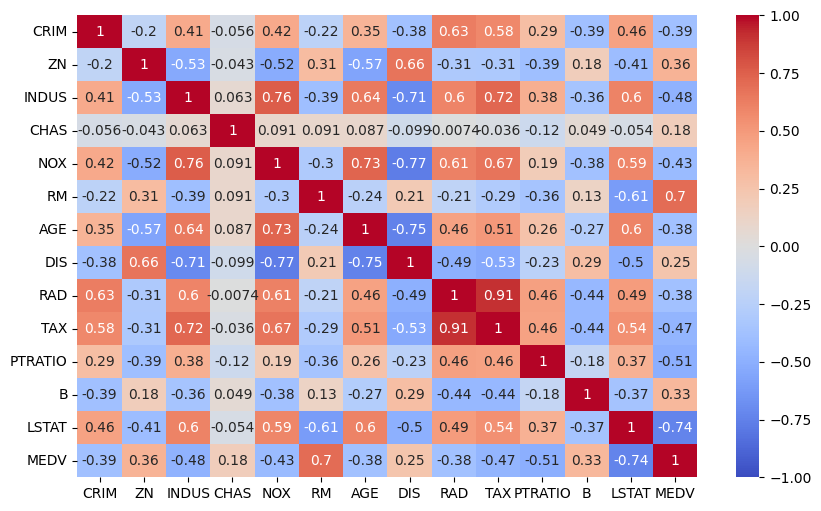

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap='coolwarm')

### Dibujar 2 gráficos de dispersión para ver la relación entre **MEDV** y **LSTAT** y **RM**

<Axes: xlabel='RM', ylabel='MEDV'>

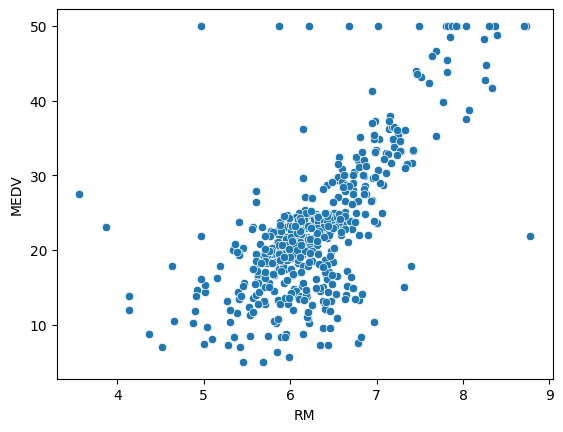

In [11]:
sns.scatterplot(x=df['RM'], y=df['MEDV'])

<Axes: xlabel='LSTAT', ylabel='MEDV'>

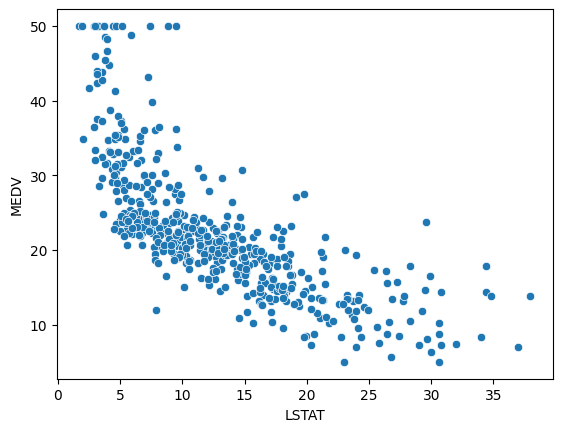

In [12]:
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])

**Preparar los datos para entrenamiento**
Crear un dataframe X incluyendo las columnas **LSTAT** y **RM**.
Y debe ser una serie de pandas incluyendo los valores objetivo **'MEDV'**

In [13]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

**Dividir los datos en conjuntos de entrenamiento y prueba**

Divide los datos de entrenamiento y prueba en 80% : 20%. Asigna random_state a cualquier valor. Esto asegura consistencia. Imprime las formas de los objetos resultantes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Regresión Lineal**

Construir un modelo de regresión lineal con sklearn LinearRegression.
Usaremos Error Cuadrático Medio y puntuación R2 para evaluar nuestro modelo, así que asegúrate de hacer las importaciones necesarias.

Importa las funciones necesarias y entrena un modelo LinearRegression

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred =lin_reg.predict(X_test)

**Evaluar el rendimiento del modelo en los conjuntos de entrenamiento y prueba**

In [20]:
print("R2 score", lin_reg.score(X_test, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.5739577415025859
MAE 3.898759721382357
MSE 31.243290601783624
RMSE 5.589569804715174


**Veamos el rendimiento del modelo visualmente. Grafiquemos y_test vs y_pred**

Graficando y_test vs y_pred. Idealmente debería haber sido una línea recta

<Axes: xlabel='MEDV'>

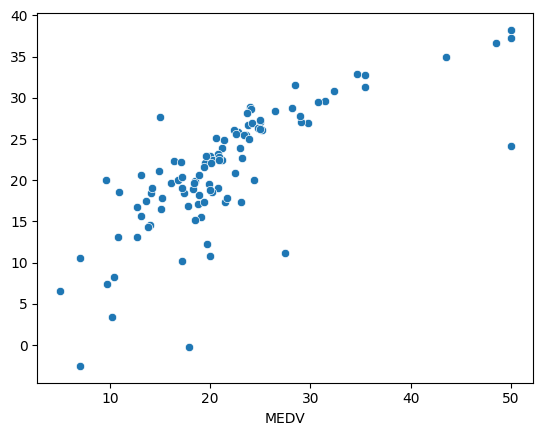

In [21]:
sns.scatterplot(x=y_test, y=y_pred)

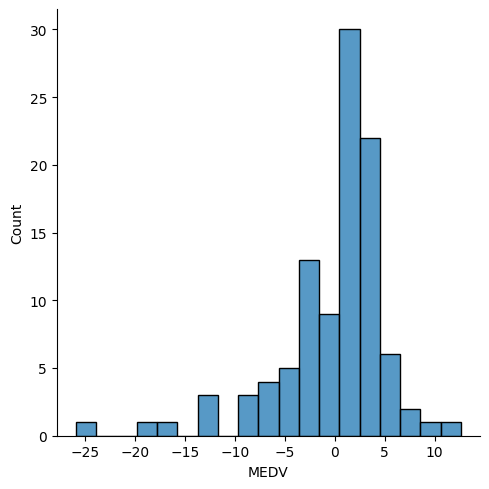

In [22]:
sns.displot(y_pred - y_test)

### Interpretación del histograma de errores del modelo

- **Eje X (MEDV):** representa los errores o residuos del modelo  
  (valor predicho − valor real).

- **Eje Y (Count):** indica la frecuencia con la que aparece cada rango de error.

#### Análisis rápido
- La mayoría de los errores se concentran cerca de **0**, lo que sugiere que el modelo **predice bien en general**.
- Existen algunos valores alejados (en los extremos), que son **outliers** o **predicciones con errores altos**.
- Si la forma del histograma es **centrada y simétrica respecto a 0**, el modelo **no tiene sesgo sistemático**  
  (no tiende a sobrestimar ni subestimar).

#### En resumen
Un histograma de residuos centrado en 0 y sin colas muy largas indica un **modelo ajustado correctamente**.  
Si, en cambio, está sesgado hacia un lado o tiene colas grandes, puede haber **sesgo o problemas de ajuste**.


# **Regresión Polinómica**

Podemos ver que **LSTAT** no varía exactamente de manera lineal. Apliquemos la Regresión Polinómica con **grado 2** y probemos. 

Para generar los grados de orden superior, usamos la clase PolynomialFeatures de la biblioteca sklearn.

In [23]:
poly_reg = PolynomialFeatures(degree=2) 
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [25]:
poly_reg_2 = LinearRegression() 
poly_reg_2.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = poly_reg_2.predict(X_test_poly)

print("R2 score", poly_reg_2.score(X_test_poly, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.7486318454509467
MAE 2.88334694736053
MSE 18.433777739110823
RMSE 4.293457550635714


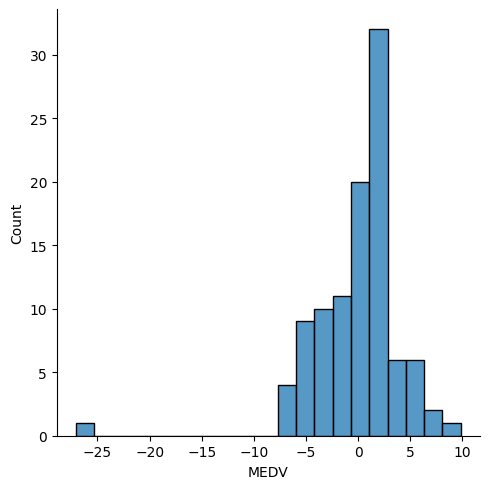

In [27]:
sns.displot(y_pred - y_test)

**¿Mejoró el modelo usando el modelo Polinómico?**

In [ ]:
si 

**¿Mejoró el modelo usando el modelo Polinómico con grado 3? ¿O más?**

R2 score 0.5075259798727063
MAE 3.1752907317986945
MSE 36.114983004107486
RMSE 6.009574278108849


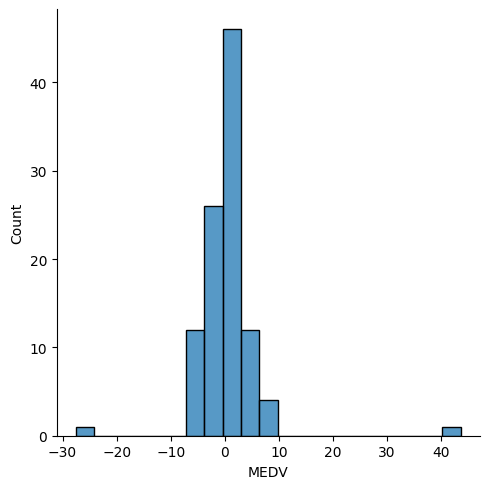

In [28]:
poly_reg = PolynomialFeatures(degree=3)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_train_poly, y_train)

y_pred = poly_reg_3.predict(X_test_poly)

print("R2 score", poly_reg_3.score(X_test_poly, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

sns.displot(y_pred - y_test)

R2 score 0.5024984184258534
MAE 3.0921921934447205
MSE 36.483673105076186
RMSE 6.040171612220648


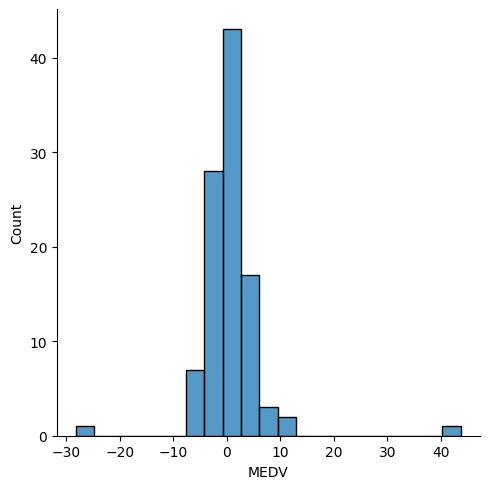

In [29]:
poly_reg = PolynomialFeatures(degree=4)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_train_poly, y_train)

y_pred = poly_reg_3.predict(X_test_poly)

print("R2 score", poly_reg_3.score(X_test_poly, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

sns.displot(y_pred - y_test)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.8055829447972158
MAE 2.5748356264162062
MSE 14.257338168909513
RMSE 3.775889056753325


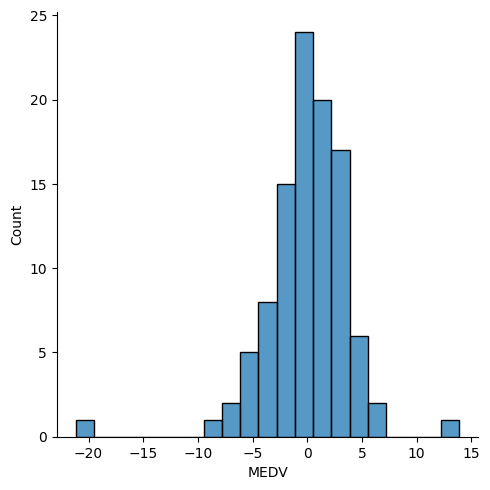

In [39]:
X = df.drop("MEDV", axis='columns')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

poly_reg = PolynomialFeatures(degree=2)

X_train_poly = poly_reg.fit_transform(X_train_scal)
X_test_poly = poly_reg.transform(X_test_scal)

poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_train_poly, y_train)

y_pred = poly_reg_2.predict(X_test_poly)

print("R2 score", poly_reg_2.score(X_test_poly, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

sns.displot(y_pred - y_test)

# no
